In [1]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

from IPython.display import clear_output, Javascript

import pytorch_drl.models.acer_models as models
from pytorch_drl.algs.acer import ACER

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device = "cpu"
print("Device:", device)

Device: cpu


## 1. Define Utils:

### 1.1 Plotting:

In [3]:
def mean_filter(arr, filter_len):
    arr = np.concatenate([[0]*(filter_len-1), arr])
    filter_arr = np.ones(filter_len)/filter_len
    arr = arr
    output = list()
    for i in range(filter_len-1, len(arr)):
        conv = np.sum(filter_arr * arr[i-filter_len+1:i+1])
        output.append(conv)
    return output

def plot(scores, n=None):
    if n is not None:
        scores = mean_filter(scores, n)
    clear_output(True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()

## 2. Create environment

In [4]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 3. Define networks

In [5]:
acer_model = models.ACERModel(state_size, action_size)

## 4. ACER Test

../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)
../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)
../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)
../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, Number alpha)
../torch/csrc/utils/python_arg_parser.cpp:698: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha,

Score:  200.0
Solved!


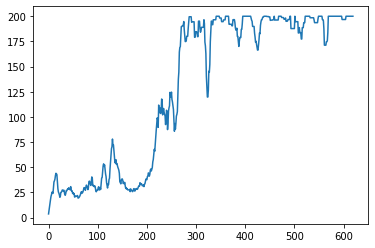

In [16]:
tmax = 200
max_episodes = 1000
n_env = mp.cpu_count()

net_constructor = models.ACERModel
net_args = (state_size, action_size,)

env_constructor = gym.make
env_args = (env_name,)
# init agent:
agent = ACER(net_constr=net_constructor,
             net_args=net_args,
             env_name=env_name,
             env_constr=env_constructor,
             env_args=env_args,
             gamma=0.99, 
             replay_n=4,
             lr=3e-4, 
             n_env=n_env,
             normalize_rewards=False,
             polyak_alpha=0.99,
             trpo_theta=1,
             use_trpo=True,
             entropy_coefficient=1e-4,
             memory_size_steps=1_000_000,
             max_episodes=max_episodes,
             max_episode_length=tmax,
             max_traj_length=20, # max number of steps before training
             start_off_policy=2000,
             clip=10,
             batch_size=64,
             max_grad_norm=None,
             seed=0,
            )
# train the agent
scores = agent.train(max_score=195.0, alg_name="acer_{}".format(env_name))

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, filter_len=n_env)
plt.plot(x, scores, label = "scores")
plt.show()

### 4.1 Trained Agent Demonstration

In [47]:
agent.test(n_episodes=5, max_t=200, render=True, deterministic=True)

200.0
200.0
200.0
200.0
200.0


## 5. ACER Continuous Test


### 5.1 Trained Agent Demonstration